# Optimisez la gestion des données d'une boutique avec R ou Python

In [1]:
#Importation des librairies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.simplefilter("ignore")
print(pd.__version__)

1.4.2


In [2]:
#Importation des données
df_erp=pd.read_excel(r"C:\Users\franc\Desktop\DATA\PROJET 5 Optimisez la gestion des données d'une boutique avec R ou Python\erp.xlsx")
df_web=pd.read_excel(r"C:\Users\franc\Desktop\DATA\PROJET 5 Optimisez la gestion des données d'une boutique avec R ou Python\web.xlsx")
df_liaison=pd.read_excel(r"C:\Users\franc\Desktop\DATA\PROJET 5 Optimisez la gestion des données d'une boutique avec R ou Python\liaison.xlsx")

# 1: Nettoyage des données

# Données ERP

In [3]:
#Affichage des données ERP
print("Données ERP")
display(df_erp.head())

Données ERP


,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [4]:
#Visualisation type et nombre de colonnes
display(df_erp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


None

In [5]:
# Changer le type de variable de product_id en object car c'est un ID
df_erp=df_erp.astype({'product_id':'object'})
df_erp.dtypes

product_id         object
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

In [6]:
#Vérification si on a des valeurs manquantes
sum_valeur_manquante_df_erp = df_erp.isnull().sum()
sum_valeur_manquante_df_erp #pas de valeurs manquantes dans df_erp 

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

In [7]:
#Recherche de duplicat dans colonne product_id clé primaire candidate
dub_product_id=df_erp.pivot_table(index=['product_id'], aggfunc='size')
  
print(dub_product_id) 

product_id
3847    1
3849    1
3850    1
4032    1
4039    1
       ..
7203    1
7204    1
7247    1
7329    1
7338    1
Length: 825, dtype: int64


In [8]:
#Recherche de duplicat
df_erp[df_erp.duplicated(['product_id'], keep= False)].sort_values(by=['product_id'])

,product_id,onsale_web,price,stock_quantity,stock_status


In [9]:
#La colonne product_id peut être utilisée comme clé primaire
df_erp.shape

(825, 5)

# Données WEB

In [10]:
#Affichage des données WEB

print("Données WEB")
display(df_web.head())

Données WEB


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [11]:
#Affichage des lignes et colonnes
df_web.shape

(1513, 28)

In [12]:
#Affichage du type 
df_web.dtypes

sku                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent                     float64
guid                             object
menu_order                      float64


In [13]:
#Vérification si on a des valeurs manquantes
sum_valeur_manquante_df_web = df_web.isnull().sum()
sum_valeur_manquante_df_web # Il y a 85 valeurs manquantes dans sku 

sku                        85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64

In [14]:
#Recherche de duplicat dans colonne sku clé primaire candidate
dub_sku_web=df_web.pivot_table(index=['sku'], aggfunc='size')
  
print('il y a des valeurs en double', dub_sku_web) 

il y a des valeurs en double sku
38                     2
41                     2
304                    2
523                    2
531                    2
                      ..
19820                  2
19821                  2
19822                  2
13127-1                2
bon-cadeau-25-euros    2
Length: 714, dtype: int64


In [15]:
#La colonne 'sku' ne peut être utilisée comme clé primaire en l'état.
#Il semble y avoir des doublons. Vérifions une ligne pour mieux comprendre ces données
df_web.loc[df_web['sku']==15298]
#Les deux lignes désignent le même objet('post_type' pour le 'product'|'attachment') (tax_status 'taxable'|'nan') 

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
799,15298,0,0,0,0.0,6.0,NaN,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [16]:
#on enlève les doublons pour ne garder que les produits et non les images en filtrant sur 'product' (on peut aussi filtre sur 'taxable')
df_web_traitement= df_web.loc[df_web['post_type']=='product']
df_web_traitement.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [17]:
#Affichage du nombre de lignes
df_web_traitement.shape

(716, 28)

In [18]:
#Test pour vérifier si on a bien enlever les doublons
df_web_traitement.loc[df_web_traitement['sku']==15298]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [19]:
#Vérification des types de variables 
df_web_traitement.info() # même si sku a le bon type de variable car ID, 
#sku est de type object au lieu de int par défaut donc suppose qu'on a des STR

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716 entries, 0 to 798
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    714 non-null    object        
 1   virtual                716 non-null    int64         
 2   downloadable           716 non-null    int64         
 3   rating_count           716 non-null    int64         
 4   average_rating         716 non-null    float64       
 5   total_sales            716 non-null    float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            716 non-null    float64       
 9   post_date              716 non-null    datetime64[ns]
 10  post_date_gmt          716 non-null    datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             716 non-null    object        
 13  post_

In [20]:
display(df_web_traitement.shape)

(716, 28)

In [21]:
# Recherche des valeurs STR 
df_web_traitement['sku'].unique() #'bon-cadeau-25-euros' '13127-1' sont des valeurs STR 

array(['bon-cadeau-25-euros', 15298, 15296, 15300, 19814, 19815, 15303,
       14975, 16042, 14980, 16041, 15269, 14977, 16044, 16043, 16449,
       16045, 16030, 13127, 19816, 16029, 16039, 16318, 16275, 16498,
       16320, 16319, 15966, 15022, 15967, 15490, 16416, 11862, 15444,
       15953, 12045, 13074, 15941, 16069, 13072, 15440, 13435, 13078,
       13117, 16296, 16014, 16462, 16013, 16180, 15676, 16120, 15564,
       15675, 15378, 15813, 13416, 14905, 15767, 16505, 15683, 16504,
       15787, 14800, 15353, 15382, 15339, 11668, 13209, 15341, 13217, 304,
       11641, 1662, 1360, 15648, 1364, 7086, 1366, 15140, 16238, 16237,
       15141, 14944, 14941, 14751, 16093, 15668, 15373, 15375, 14474,
       15482, 13453, 15075, 16124, 15785, 15784, 15786, 14332, 16210,
       16211, 16209, 15629, 15583, 16160, 16166, 15783, 16560, 15747,
       15746, 16190, 16189, 16265, 16191, 16263, 15605, 16529, 15441,
       13032, 16256, 16322, 16295, 15656, 15655, 15415, 15414, 15413,
       1602

In [22]:
#En localisant la ligne, c'est peut-être une erreur de manipulation humaine 
df_web_traitement.loc[df_web_traitement['sku']=='13127-1']

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
797,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [23]:
df_web_traitement.loc[df_web_traitement['sku']==13127] 
# après comparaison avec 13127, on s'aperçoit qu'il s'agit de deux produits différents car 2 appellations: 2007 et 2012

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
18,13127,0,0,0,0.0,23.0,taxable,NaN,2.0,2018-02-12 11:18:33,...,clos-du-mont-olivet-chateauneuf-du-pape-2012,2020-08-24 18:25:02,2020-08-24 16:25:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [24]:
#Affichage de la ligne 'bon-cadeau-25-euros'
df_web_traitement.loc[df_web_traitement['sku']=='bon-cadeau-25-euros']

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [25]:
# on décide de ne pas supprimer les lignes 'bon-cadeau-25-euros' & '13127-1' car elles ont des données
df_web_clean=df_web_traitement

In [26]:
#Recherche des valeurs manquantes
df_web_clean.loc[df_web_clean['sku'].isnull()]#On voit qu'on a 2 valeurs manquantes dans sku, sélection des valeurs NAN

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [27]:
# # Les lignes 470 et 471 n'ont pas de donnée dans sku mais contiennent tout de même des informations. 
# Néanmoins ces données sont non identifiables et donc non pertinent de les conserver dans notre data frame dans un premier temps
#Suppression des lignes 470 & 471
df_web_clean_sans_nan=df_web_clean.drop([470,471])
df_web_clean_sans_nan.shape

(714, 28)

# Liaison

In [28]:
#Affichage des données Liaison
print("Données liaison")
display(df_liaison.head())

Données liaison


,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [29]:
#Affichage du type de données
df_liaison.info() # il manque des données  91 données dans sku

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [30]:
#Renommination de la colonne id_web en SKU (code barre produit) comme souligné par Sylvie
df_liaison.rename(columns={'id_web':'sku'} , inplace=True)
df_liaison.head()

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [31]:
#Vérification si on a des valeurs manquantes
sum_valeur_manquante_df_liaison= df_liaison.isnull().sum()
sum_valeur_manquante_df_liaison # Il y a 91 valeurs manquantes dans sku 

product_id     0
sku           91
dtype: int64

In [58]:
#Recherche de duplicat dans colonne sku clé primaire candidate
dub_sku_df_liaison=df_liaison.pivot_table(index=['sku','product_id'], aggfunc='size')
  
print(dub_sku_df_liaison.value_counts()) #pas de doublons mais on remarque des valeurs STR '13127-1','14680-1', 'bon-cadeau-25-euros'


1    734
dtype: int64


In [33]:
# pas de valeurs manquantes dans product_id
display(df_erp.shape)

display(df_liaison.shape)

(825, 5)

(825, 2)

In [34]:
# Jointure pour avoir les valeurs sku manquantes 
df_erp_liaison= pd.merge(df_erp,df_liaison, on="product_id", how="outer",indicator=True)
df_erp_liaison.rename(columns={'_merge':'_merge_erp_liaison'},inplace=True)

In [35]:
#Affichage de la jointure
df_erp_liaison.head()

,product_id,onsale_web,price,stock_quantity,stock_status,sku,_merge_erp_liaison
0,3847,1,24.2,0,outofstock,15298,both
1,3849,1,34.3,0,outofstock,15296,both
2,3850,1,20.8,0,outofstock,15300,both
3,4032,1,14.1,0,outofstock,19814,both
4,4039,1,46.0,0,outofstock,19815,both


In [36]:
#Affichage de la nature des jointures effectuées
df_erp_liaison['_merge_erp_liaison'].value_counts()

both          825
left_only       0
right_only      0
Name: _merge_erp_liaison, dtype: int64

In [37]:
df_erp_liaison.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 824
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   product_id          825 non-null    object  
 1   onsale_web          825 non-null    int64   
 2   price               825 non-null    float64 
 3   stock_quantity      825 non-null    int64   
 4   stock_status        825 non-null    object  
 5   sku                 734 non-null    object  
 6   _merge_erp_liaison  825 non-null    category
dtypes: category(1), float64(1), int64(2), object(3)
memory usage: 46.1+ KB


In [38]:
#Jointure entre df_erp_liaison et df_web_clean_sans_nan
df_merge=pd.merge(df_erp_liaison,df_web_clean_sans_nan, on="sku", how='outer',indicator=True)
df_merge.head()


,product_id,onsale_web,price,stock_quantity,stock_status,sku,_merge_erp_liaison,virtual,downloadable,rating_count,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
0,3847,1,24.2,0,outofstock,15298,both,0.0,0.0,0.0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1,3849,1,34.3,0,outofstock,15296,both,0.0,0.0,0.0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
2,3850,1,20.8,0,outofstock,15300,both,0.0,0.0,0.0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
3,4032,1,14.1,0,outofstock,19814,both,0.0,0.0,0.0,...,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
4,4039,1,46.0,0,outofstock,19815,both,0.0,0.0,0.0,...,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both


In [39]:
# On regarde notre colonne df_merge['_merge'] ==> left_only ou right_only only car ça veut dire que nous n'avons pas de correspondance
df_merge['_merge'].value_counts()

both          714
left_only     111
right_only      0
Name: _merge, dtype: int64

In [40]:
#Nous vérifions ensuite les données manquantes avec left_only
df_merge_manquant_left= df_merge.loc[df_merge['_merge']=='left_only']
df_merge_manquant_left.head() #Ce sont tous les sku qu'on ne retrouve pas dans le site web 

,product_id,onsale_web,price,stock_quantity,stock_status,sku,_merge_erp_liaison,virtual,downloadable,rating_count,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
19,4055,0,86.1,0,outofstock,NaN,both,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
20,4090,0,73.0,0,outofstock,NaN,both,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
21,4092,0,47.0,0,outofstock,NaN,both,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
22,4195,0,14.1,0,outofstock,NaN,both,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
23,4209,0,73.5,0,outofstock,NaN,both,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [41]:
#On supprime tous les left_only pour lesquels nous n'avons pas assez d'informations
#Nous avons les product_id mais pas les sku donc nous ne pouvons pas matcher les données (inexploitables). 

df_merge_final=df_merge.loc[df_merge['_merge']=='both']
df_merge_final=df_merge_final.drop(['_merge_erp_liaison','_merge'],axis=1)
df_merge_final.shape

(714, 33)

In [42]:
display(df_merge_final.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 824
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   product_id             714 non-null    object        
 1   onsale_web             714 non-null    int64         
 2   price                  714 non-null    float64       
 3   stock_quantity         714 non-null    int64         
 4   stock_status           714 non-null    object        
 5   sku                    714 non-null    object        
 6   virtual                714 non-null    float64       
 7   downloadable           714 non-null    float64       
 8   rating_count           714 non-null    float64       
 9   average_rating         714 non-null    float64       
 10  total_sales            714 non-null    float64       
 11  tax_status             714 non-null    object        
 12  tax_class              0 non-null      float64       
 13  post_

None

# 2a : Chiffre d’affaires par produit

In [43]:
#Affichage du dataframe final
df_merge_final.head()

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,1,24.2,0,outofstock,15298,0.0,0.0,0.0,0.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,3849,1,34.3,0,outofstock,15296,0.0,0.0,0.0,0.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,3850,1,20.8,0,outofstock,15300,0.0,0.0,0.0,0.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,4032,1,14.1,0,outofstock,19814,0.0,0.0,0.0,0.0,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,4039,1,46.0,0,outofstock,19815,0.0,0.0,0.0,0.0,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [44]:
#Vérification des valeurs uniques pour vérifier si nous n'avons pas d'aberration (ex valeurs négatives)
df_merge_final['total_sales'].unique()

array([ 6.,  0.,  3.,  7., 14.,  1., 23., 10., 18., 11.,  9., 20., 19.,
       62.,  4., 12.,  5.,  2., 40., 30., 87., 36., 43., 13., 17., 42.,
        8., 46., 16., 15., 96., 32., 38., 29., 33., 22., 24., 26., 21.,
       41., 37.])

In [45]:
#Ajout et calcul de la colonne 'CA_product'
df_merge_final['CA_product']=df_merge_final['price']*df_merge_final['total_sales']
df_merge_final.head()

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,CA_product
0,3847,1,24.2,0,outofstock,15298,0.0,0.0,0.0,0.0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,145.2
1,3849,1,34.3,0,outofstock,15296,0.0,0.0,0.0,0.0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
2,3850,1,20.8,0,outofstock,15300,0.0,0.0,0.0,0.0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
3,4032,1,14.1,0,outofstock,19814,0.0,0.0,0.0,0.0,...,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,42.3
4,4039,1,46.0,0,outofstock,19815,0.0,0.0,0.0,0.0,...,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0


In [46]:
#Création d'un df plus lisible avec ajout de la colonne chiffre d’affaires par produit
df_merge_final_ca_product=df_merge_final[['product_id','price','total_sales','CA_product']]
df_merge_final_ca_product.head()

,product_id,price,total_sales,CA_product
0,3847,24.2,6.0,145.2
1,3849,34.3,0.0,0.0
2,3850,20.8,0.0,0.0
3,4032,14.1,3.0,42.3
4,4039,46.0,0.0,0.0


# 2b: Chiffre d’affaires total réalisé en ligne

In [47]:
#Calcul du chiffre d’affaires réalisé en ligne
CA_total=df_merge_final_ca_product['CA_product'].sum()
print("Le chiffre d’affaires réalisé en ligne est de",CA_total,"€")

Le chiffre d’affaires réalisé en ligne est de 70568.6 €


# 3: Analyse des valeurs aberrantes sur le prix

In [48]:
#Vérification des valeurs abhérrantes dans prix
display(df_merge_final_ca_product.info())
df_merge_final_ca_product['price'].unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 824
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   product_id   714 non-null    object 
 1   price        714 non-null    float64
 2   total_sales  714 non-null    float64
 3   CA_product   714 non-null    float64
dtypes: float64(3), object(1)
memory usage: 27.9+ KB


None

array([ 24.2 ,  34.3 ,  20.8 ,  14.1 ,  46.  ,  32.7 ,  31.2 ,  60.  ,
        42.6 ,  80.  ,  18.3 ,  22.8 ,  19.3 ,  21.8 ,   7.7 ,  33.7 ,
        44.3 ,  71.6 ,  12.7 ,   8.7 ,  11.9 ,  14.5 ,  14.4 ,  19.5 ,
        22.  ,  16.6 ,  23.4 ,  33.2 ,  32.  ,  77.8 ,  14.7 ,  14.05,
        22.9 ,  44.  ,  37.  ,  39.  ,  17.  ,  23.2 ,  19.  ,  16.4 ,
        13.7 ,  12.6 ,  12.8 ,  22.1 ,  15.8 ,  16.3 ,   9.7 ,   6.8 ,
        35.  ,  31.7 , 100.  ,  23.  ,  88.4 ,  29.8 ,  25.7 ,  77.4 ,
        53.  ,  49.  ,  29.5 ,  33.  ,  37.5 ,  69.  ,  59.  ,  19.2 ,
        29.  ,   9.8 ,  20.35,  12.  ,  18.5 ,   9.3 ,  11.6 ,  14.3 ,
        10.8 ,   7.6 ,  20.5 ,  18.2 ,   9.  ,   7.8 ,   5.7 ,  13.5 ,
        11.5 ,  24.  ,  16.7 ,  21.4 ,  13.3 ,   9.5 ,  12.1 ,  17.8 ,
        27.2 ,   9.4 ,   5.8 ,  38.  ,   9.9 ,  11.3 ,   6.7 ,  79.8 ,
        48.5 ,  39.8 ,  58.8 ,  26.5 ,  13.4 ,  17.1 ,   8.9 ,  17.2 ,
        16.9 ,  29.9 ,   9.6 ,  11.1 ,  28.  ,   8.6 ,  15.3 ,  14.8 ,
      

In [49]:
#Vérification pour voir si on a des valeurs nulles mais ça ne devrait pas être le cas car min 5,20
df_merge_final_ca_product['price'].isnull().sum() #pas de valeur nulle ou négative

0

In [50]:
#Affichage des statistiques principales de la variable price
df_merge_final_ca_product['price'].describe()

count    714.000000
mean      32.493137
std       27.810525
min        5.200000
25%       14.100000
50%       23.550000
75%       42.175000
max      225.000000
Name: price, dtype: float64

In [51]:
# On remarque des outliers potentiels. Néanmoins, il faudra se rapprocher des équipes en interne pour confirmation. 
#La médiane est sensible aux outliers on a un max de 225 alors que notre médiane est de 23.55

In [52]:
#fonction pour trouver les outliers
def trouver_outliers_IQR(df_merge_final_ca_product):

   q1=df_merge_final_ca_product.quantile(0.25)

   q3=df_merge_final_ca_product.quantile(0.75)

   IQR=q3-q1

   outliers = df_merge_final_ca_product[((df_merge_final_ca_product<(q1-1.5*IQR)) | (df_merge_final_ca_product>(q3+1.5*IQR)))]

   return outliers


In [53]:
outliers = trouver_outliers_IQR(df_merge_final_ca_product["price"])

print("Nombre d'outliers:"+ str(len(outliers)))

print("Valeur outlier maximal:"+ str(outliers.max()))

print("Valeur outlier minimal:"+ str(outliers.min()))

Nombre d'outliers:32
Valeur outlier maximal:225.0
Valeur outlier minimal:85.6


In [54]:
# Liste des outliers
print(outliers.sort_values())

297     85.6
539     86.8
156     88.4
605     92.0
707     93.0
765     99.0
154    100.0
477    102.3
314    104.0
531    105.0
530    105.0
757    105.6
311    108.5
320    109.6
538    112.0
709    114.0
763    115.0
766    115.0
758    116.4
764    121.0
767    121.0
708    122.0
615    124.8
293    126.5
752    135.0
478    137.0
313    157.0
657    175.0
310    176.0
692    191.3
525    217.5
291    225.0
Name: price, dtype: float64


<AxesSubplot:>

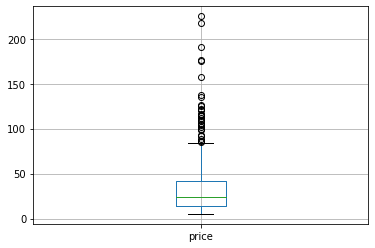

In [55]:
#Affichage de la boîte à moutaches
df_merge_final_ca_product.boxplot(column =['price'], grid = True)

In [56]:
#Dans le domaine du vin, les outliers peuvent être cohérents selon la stratégie de l'entreprise 
#qui peut se positionner sur plusieurs segments. Cela nécessite confirmation en interne. 